In [1]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 443, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 443 (delta 156), reused 137 (delta 128), pack-reused 232
Receiving objects: 100% (443/443), 12.86 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (228/228), done.


In [2]:
%cd /kaggle/working/GroundingDINO/
!pip install -e .

/kaggle/working/GroundingDINO
Obtaining file:///kaggle/working/GroundingDINO
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 8.5 MB/s eta 0:00:00
  Running setup.py develop for groundingdino


In [3]:
!mkdir weights
%cd weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/kaggle/working/GroundingDINO/weights


In [4]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import cv2

In [5]:
%cd /kaggle/working/GroundingDINO
from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model("groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")

/kaggle/working/GroundingDINO


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [24]:
def get_boxes(boxes):
    box_in_img = []
    for i, score in enumerate(boxes):
        single_pred_str = ""
        
        x_center , y_center, width,height = boxes[i]
#         print(boxes[i])
        x1 = float(x_center) - (float(width) / 2)
        y1 = float(y_center) - (float(height) / 2)
        width = float(width)
        height = float(height)
        box_in_img.append([x1,y1,x1+width,y1+height])
    return box_in_img
def annotate_on_frame(image_url, text_prompt, box_treshold = 0.35, text_treshold = 0.25):
    image_source, image = load_image(image_url)

    boxes, logits, phrases = predict(
        model=model,
        image=image,
        caption=text_prompt,
        box_threshold=box_treshold,
        text_threshold=text_treshold
    )
    return get_boxes(boxes.cpu().numpy())
def abc(boxes,lab):
    lb = []
    pre = []
    for box in range(len(boxes)):
        lb.append(lab)
        pre.append(1.0)
    return lb,pre
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
def showim_xywhn(path,boxes,classes,scores):
    image = plt.imread(path)
    fig, ax = plt.subplots()
    ax.imshow(image)
    i=0
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i]
        imge = Image.open(path) 
  
        # get width and height 
        w = imge.width 
        h = imge.height
        x1=x1*w
        y1=y1*h
        x2=x2*w
        y2=y2*h
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, f"{classes[i]} {scores[i]:.2f}", fontsize=8, color='red')
#     for box, clas, scor in zip(boxes, classes, scores):
#         x1, y1, x2, y2 = width_height(box[i])
#         rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
#         ax.add_patch(rect)
#         i=i+1
#         ax.text(x1, y1 - 5, f"{clas} {scor:.2f}", fontsize=8, color='red')
    plt.axis('off')  # Turn off axes for a cleaner look
    plt.title('Image with Bounding Boxes and Labels')
    plt.show()


In [35]:
prompt = 'sunglass'

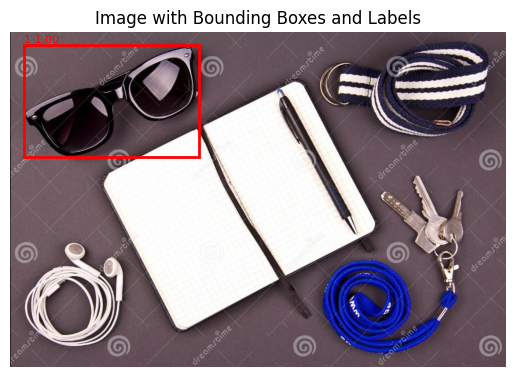

In [36]:
BOX_TRESHOLD = 0.5
TEXT_TRESHOLD = 0.7
TEXT_PROMPT = prompt
url = '/kaggle/input/images/Screenshot 2024-05-20 151216.jpg'
box = annotate_on_frame(url,TEXT_PROMPT,BOX_TRESHOLD, TEXT_TRESHOLD)
lb,pre=abc(box,1)
showim_xywhn(url,box,lb,pre)